In [1749]:
import pandas as pd
import numpy as np

In [1750]:
#problem 1 : 1
"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/Auto.csv"

df = pd.read_csv(PATH)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [1751]:
df_simple = df[['horsepower','mpg']]
df_simple.head()

,horsepower,mpg
0,130,18.0
1,165,15.0
2,150,18.0
3,150,16.0
4,140,17.0


I only want to keep the two columns I need for the problem

In [1752]:
df_simple = df_simple.sort_values(by='horsepower')
print(df_simple.head())
df_simple.tail()

    horsepower   mpg
133        100  16.0
98         100  16.0
256        100  20.5
107        100  18.0
334        100  23.7


,horsepower,mpg
336,?,23.6
126,?,21.0
354,?,34.5
32,?,25.0
330,?,40.9


In [1753]:
print('hp min:', df_simple['horsepower'].min())
print('hp max:', df_simple['horsepower'].max())

hp min: 100
hp max: ?


In [1754]:
print('# unique values in horsepower:', df_simple['horsepower'].nunique())
print('# unique values in mpg:', df_simple['mpg'].nunique())

# unique values in horsepower: 94
# unique values in mpg: 129


In [1755]:
df_simple = df_simple.drop(df_simple[df_simple['horsepower'] == "?"].index)

I want to get rid of these "?" string values

In [1756]:
print('# unique values in horsepower:', df_simple['horsepower'].nunique())
print('# unique values in mpg:', df_simple['mpg'].nunique())

# unique values in horsepower: 93
# unique values in mpg: 127


In [1757]:
print('hp min:', df_simple['horsepower'].min())
print('hp max:', df_simple['horsepower'].max())

hp min: 100
hp max: 98


ok, they're gone

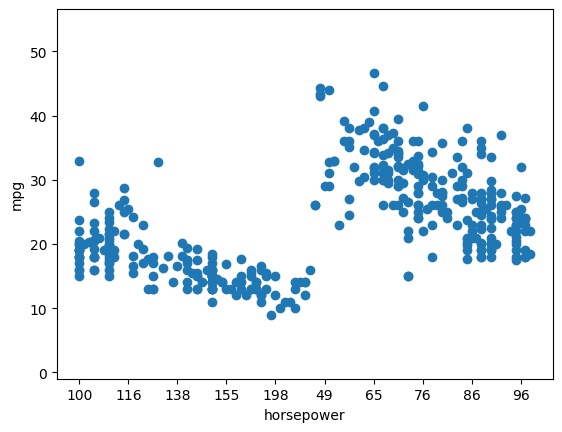

In [1758]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = df_simple['horsepower']
y = df_simple['mpg']

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_ylim(y.min() - 10, y.max() + 10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

plt.show()

xaxis increases from 100-198, then it "starts over" from 49-96

it seems like the 49-96 section actually fits nicely with the 100-198 section. If only it were concatted behind the 100-196 section. I don't know why this is happening

In [1759]:
df_simple.dtypes

,0
horsepower,object
mpg,float64


In [1760]:
df_simple['horsepower'] = df_simple['horsepower'].astype('float')
df_simple.dtypes

,0
horsepower,float64
mpg,float64


In [1761]:
df_simple = df_simple.sort_values(by='horsepower')
print(df_simple.head())
df_simple.tail()

     horsepower   mpg
19         46.0  26.0
102        46.0  26.0
244        48.0  43.1
326        48.0  43.4
325        48.0  44.3


,horsepower,mpg
6,220.0,14.0
13,225.0,14.0
8,225.0,14.0
95,225.0,12.0
116,230.0,16.0


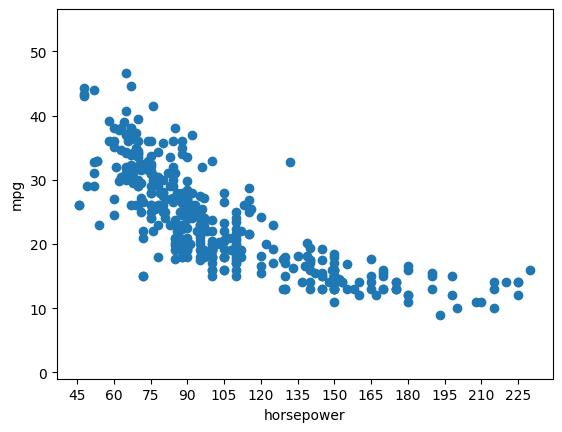

In [1762]:
X = df_simple['horsepower']
y = df_simple['mpg']

fig, ax = plt.subplots()
ax.scatter(X, y)

ax.set_ylim(y.min() - 10, y.max() + 10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(15))

ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

plt.show()

ok, perfect. The problem was that the values in 'horsepower' were objects, not floats. Now they are sorted correctly.

In [1763]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (313,) (313,)
Test set: (79,) (79,)


In [1764]:
#problem 1 : 2
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model.fit(X_train, y_train)

LinearRegression()

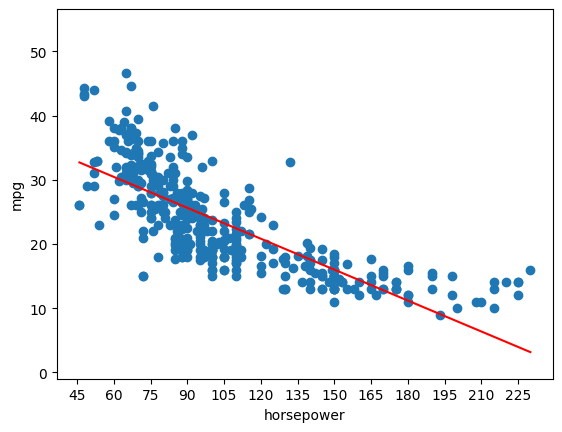

In [1765]:
#problem 1 : 3
regr_line = model.coef_[0] * X + model.intercept_

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, regr_line, 'r')

ax.set_ylim(y.min() - 10, y.max() + 10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(15))

ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

plt.show()

In [1766]:
#problem 1 : 4
y_hat = model.predict(X_test)

SS_per_entry = (y_test - y_hat)**2
RSS = SS_per_entry.sum()
RSS

2135.938103802722

In [1767]:
df_multiple = df.drop(columns=['name'])
df_multiple.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [1768]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [1769]:
df_multiple = df_multiple.drop(df_multiple[df_multiple['horsepower'] == "?"].index)

In [1770]:
df_multiple = df_multiple.astype('float')
df_multiple.dtypes

,0
mpg,float64
cylinders,float64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
year,float64
origin,float64


changed every object type to floats to avoid the same problem I encountered earlier

<Axes: >

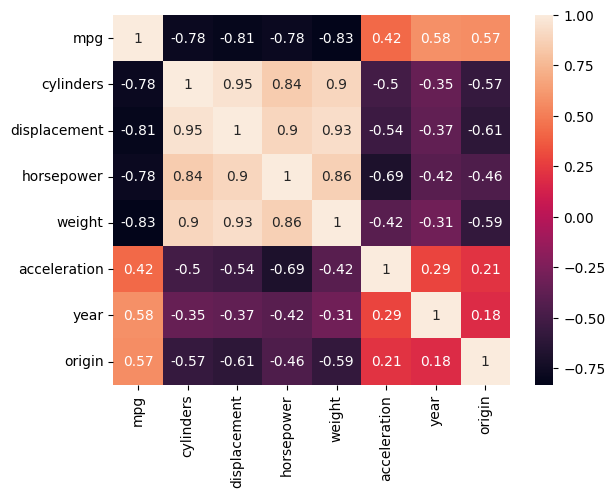

In [1771]:
#problem 2 : 1
import seaborn as sns

corr_table = df_multiple.corr()
sns.heatmap(corr_table, annot=True)

Clearly, everything in the near black, and in the near white are all heavily correlated to each other: (mpg, cylinders), (mpg, displacement), (mpg, horsepower), (mpg, weight), (cylinders, diplacement), (cylinders, horsepower), (cylinders, weight), (displacement, horsepower), (displacement, weight), (horsepower, weight)

In [1772]:
X = df_multiple.drop(columns=['mpg'])
y = df_multiple['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (313, 7) (313,)
Test set: (79, 7) (79,)


In [1773]:
#problem 2 : 2
multiple_regression = LinearRegression()

multiple_regression.fit(X_train, y_train)

print('coefs:', multiple_regression.coef_)
print()

y_hat = multiple_regression.predict(X_test)

SS_per_entry = (y_test - y_hat)**2
RSS = SS_per_entry.sum()
print('RSS:', RSS)

coefs: [-0.39442583  0.01916122 -0.0131316  -0.00689886  0.00481537  0.73415644
  1.40994284]

RSS: 845.9135264398851


***problem 2 : 3*** RSS for multiple linear regression is less than that for simple linear regression, so the multiple linear regression model performed better.

In [1774]:
#problem 3 : a
x = np.random.normal(loc=0, scale=1, size=100)

In [1775]:
#problem 3 : b
eps = np.random.normal(loc=0, scale=0.025, size=100)

In [1776]:
#problem 3 : c
y = -1 + 0.5 * x + eps

dim(y) = 100 | b_0 = -1 | b_1 = 0.5

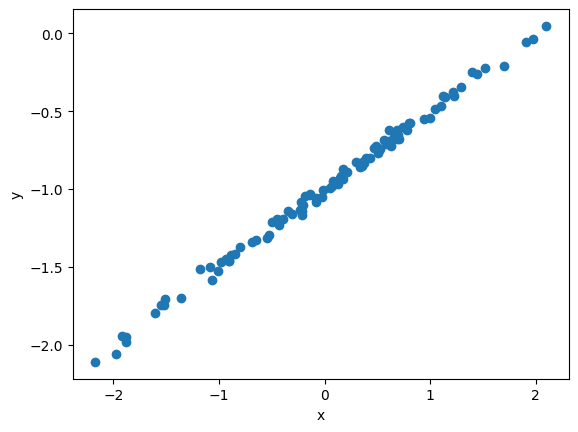

In [1777]:
#problem 3 : d
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

I see a nearly perfect linear relationship between x and y. I see that x generated values almost entirely between -2 and 2, though most seem to be between -1 and 2.

In [1778]:
#problem 3 : e
linear_model = LinearRegression()

print('x old shape:', x.shape)
print('y old shape:', y.shape)
print()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print('x new shape:', x.shape)
print('y new shape:', y.shape)

linear_model.fit(x, y)

print('b_1', linear_model.coef_[0])
print('b_0', linear_model.intercept_)

x old shape: (100,)
y old shape: (100,)

x new shape: (100, 1)
y new shape: (100, 1)
b_1 [0.50023372]
b_0 [-0.99976725]


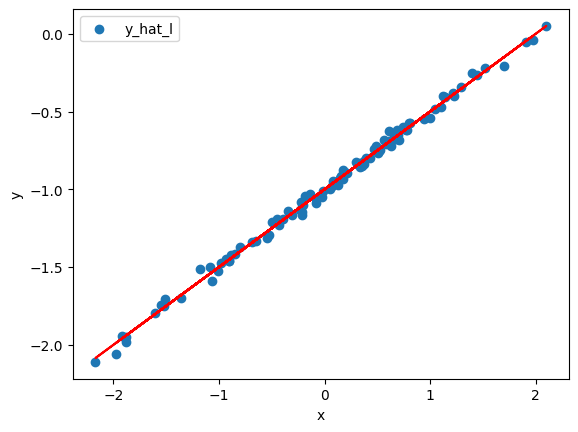

In [1779]:
#problem 3 : f
y_hat_l = linear_model.intercept_ + linear_model.coef_[0] * x

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x, y_hat_l, 'r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.legend(['y_hat_l'])

plt.show()

In [1780]:
x_col1 = x
x_col2 = x**2

X = np.array([x_col1, x_col2]).T
X = X.reshape(-1, 2)

In [1781]:
model_quad = LinearRegression()

model_quad.fit(X, y)

y_hat_q = model_quad.intercept_ + model_quad.coef_[0][0] * x + model_quad.coef_[0][1] * x**2

In [1782]:
#problem 3 : g
SS_per_entry_l = (y - y_hat_l)**2
RSS_l = SS_per_entry_l.sum()

SS_per_entry_q = (y - y_hat_q)**2
RSS_q = SS_per_entry_q.sum()

print('Linear model RSS:', RSS_l)
print('Quadratic model RSS:', RSS_q)

Linear model RSS: 0.07930544310012115
Quadratic model RSS: 0.0786567109277178


The quadratic model seems to have performed better when comparing the residual sum of squares for both models, but negligably so, actually. The models pretty much performed the same.

#Problem 3 : h

In [1783]:
x = np.random.normal(loc=0, scale=1, size=100)

In [1784]:
eps = np.random.normal(loc=0, scale=0.01, size=100)

In [1785]:
y = -1 + 0.5 * x + eps

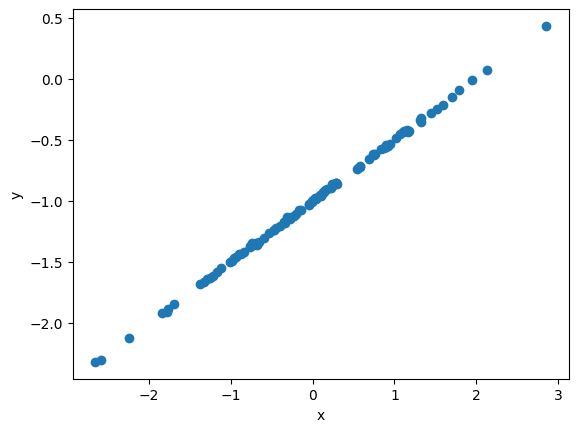

In [1786]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [1787]:
linear_model = LinearRegression()

print('x old shape:', x.shape)
print('y old shape:', y.shape)
print()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print('x new shape:', x.shape)
print('y new shape:', y.shape)

linear_model.fit(x, y)

print('b_1', linear_model.coef_[0])
print('b_0', linear_model.intercept_)

x old shape: (100,)
y old shape: (100,)

x new shape: (100, 1)
y new shape: (100, 1)
b_1 [0.50056338]
b_0 [-0.99866838]


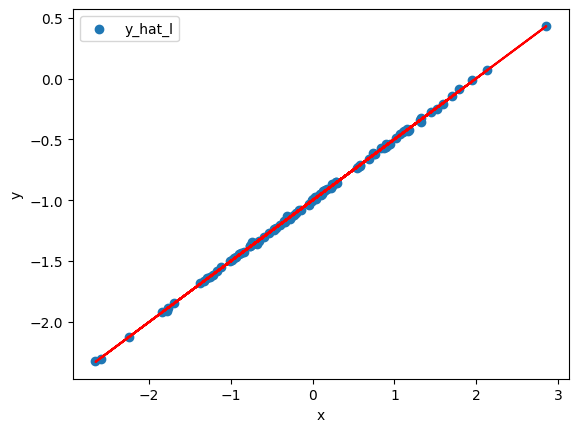

In [1788]:
y_hat_l = linear_model.intercept_ + linear_model.coef_[0] * x

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x, y_hat_l, 'r')

ax.legend(['y_hat_l'])

plt.show()

In [1789]:
x_col1 = x
x_col2 = x**2

X = np.array([x_col1, x_col2]).T
X = X.reshape(-1, 2)

In [1790]:
model_quad = LinearRegression()

model_quad.fit(X, y)

print(model_quad.coef_)

y_hat_q = model_quad.intercept_ + model_quad.coef_[0][0] * x + model_quad.coef_[0][1] * x**2

[[5.00577435e-01 2.16877912e-04]]


In [1791]:
SS_per_entry_l = (y - y_hat_l)**2
RSS_l = SS_per_entry_l.sum()

SS_per_entry_q = (y - y_hat_q)**2
RSS_q = SS_per_entry_q.sum()

print('Linear model RSS:', RSS_l)
print('Quadratic model RSS:', RSS_q)

Linear model RSS: 0.007491053311729559
Quadratic model RSS: 0.007480147647519881


Here, both models performed pretty much the same again, but it seems like the quadratic one beats the linear one by a smaaaall amount, again (when comparing the RSS for both models). Additionally, the error for both models is closer to 0.01, whereas the previous models had RSS of about 0.05. This is likely due to the reduced noise in the true values for y for these models.

#problem 3 : i

In [1792]:
x = np.random.normal(loc=0, scale=1, size=100)

In [1793]:
eps = np.random.normal(loc=0, scale=0.5, size=100)

In [1794]:
y = -1 + 0.5 * x + eps

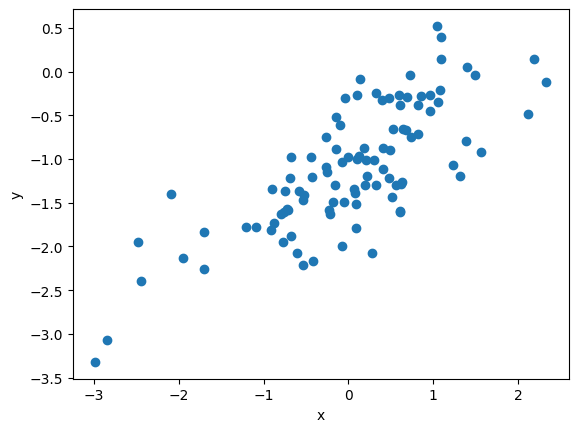

In [1795]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [1796]:
linear_model = LinearRegression()

print('x old shape:', x.shape)
print('y old shape:', y.shape)
print()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print('x new shape:', x.shape)
print('y new shape:', y.shape)

linear_model.fit(x, y)

print('b_1', linear_model.coef_[0])
print('b_0', linear_model.intercept_)

x old shape: (100,)
y old shape: (100,)

x new shape: (100, 1)
y new shape: (100, 1)
b_1 [0.54889274]
b_0 [-1.12180068]


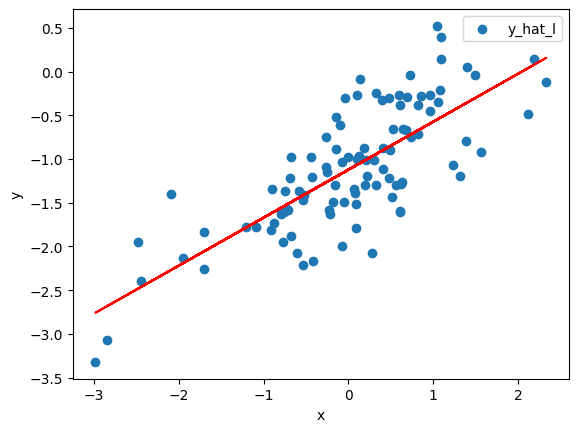

In [1797]:
y_hat_l = linear_model.intercept_ + linear_model.coef_[0] * x

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x, y_hat_l, 'r')

ax.legend(['y_hat_l'])

plt.show()

In [1798]:
x_col1 = x
x_col2 = x**2

X = np.array([x_col1, x_col2]).T
X = X.reshape(-1, 2)

In [1799]:
model_quad = LinearRegression()

model_quad.fit(X, y)

y_hat_q = model_quad.intercept_ + model_quad.coef_[0][0] * x + model_quad.coef_[0][1] * x**2

In [1800]:
SS_per_entry_l = (y - y_hat_l)**2
RSS_l = SS_per_entry_l.sum()

SS_per_entry_q = (y - y_hat_q)**2
RSS_q = SS_per_entry_q.sum()

print('Linear model RSS:', RSS_l)
print('Quadratic model RSS:', RSS_q)

Linear model RSS: 21.35301887602315
Quadratic model RSS: 21.30147907315912


The quadratic model performed better here, but also not by much. Also, the RSS error for both models seems to eb closer to 20 - the highest out of all the models, again likely due to the increased noise in the real values of y for these models.